In [1]:
import pandas as pd
import numpy as np

In [371]:
data = pd.read_csv('output.csv')

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (52,53,54,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [248]:
data.head()

,QuoteID,NameOfQuote,QuoteType,CreationDate,ExpirationDate,CurrentQuoteStatus,CreatedLogon,LastModifiedLogon,SalesPersonName,CompanyName,...,Total.Sales,Total.Cost,Gross.Margin,Gross.Margin..,salesperson_name,Salesperson.Code,Acquired.By,DaysOld,category,sold_to_code
0,18744620.0,Kevin,Purchase,2019/1/2,2019/1/9,Expired,X632257,X632257,"HALE,DUSTIN",NaN,...,"US$27,800.00","US$27,749.36",US$50.64,0.0018,DUSTIN HALE,S0112,S0431,21,2WD,FOSKITKEC54284
1,18749945.0,NaN,Purchase,2019/1/2,2019/1/9,Expired,X453335,X453335,"KINCH,AARON",JA LENE FARM,...,"US$9,825.00","US$7,972.29","US$1,852.71",0.1886,AARON KINCH,S1832,NaN,9,WAG,ISHLERTOC28992
2,18745949.0,Tom C,Purchase,2019/1/2,2019/1/9,Expired,X632257,X632257,"HALE,DUSTIN",NaN,...,"US$9,700.00","US$8,685.25","US$1,014.75",0.1046,DUSTIN HALE,S0112,S1919,152,GAT,CONGDONTC20560
3,18748176.0,Town of Niagara Mower,Purchase,2019/1/2,2019/1/31,Signed,X795544,XP66722,"PAYMENT,RYAN",TOWN OF NIAGARA,...,US$389.00,US$322.00,US$67.00,0.1722,OLIN BAILEY,S1018,NaN,338,WBP,TOWNOFC4868
4,18748718.0,RICHARD DECKER,Purchase,2019/1/2,2019/1/31,Won,X358036,X358036,"AMICK JR,ROBERT",NaN,...,"US$2,295.00","US$1,815.50",US$479.50,0.2089,ROBERT AMICK,S1736,NaN,151,MOW,DECKERRICHARD32


In [249]:
data.shape

(37307, 81)

In [250]:
data.columns

Index(['QuoteID', 'NameOfQuote', 'QuoteType', 'CreationDate', 'ExpirationDate',
       'CurrentQuoteStatus', 'CreatedLogon', 'LastModifiedLogon',
       'SalesPersonName', 'CompanyName', 'ContactLastName', 'ContactFirstName',
       'City', 'StateProvince', 'PostalZip', 'Phone', 'Customer.Email',
       'DealerID', 'DealerName', 'DealerCity', 'DealerState', 'EquipmentCode',
       'EquipmentDescription', 'EquipmentType', 'EquipmentSerialNumber',
       'EquipmentQuantity', 'EquipmentAmount', '[Total.Sales]', 'SellingPrice',
       'EquipmentManufacturer', 'EquipmentCategoryDesc',
       'EquipmentSubCategoryDesc', 'EquipmentManufactureYear',
       'EquipmentModel', 'StockNumber', 'IncentiveProgramNumber',
       'EquipmentStatus', 'TradeInCode', 'TradeInDescription',
       'TradeInSerialNumber', 'TradeInQuantity', 'NetTradeValue',
       'TradeInManufacturer', 'TradeInCategoryDesc', 'TradeInSubCategoryDesc',
       'TradeInManufactureYear', 'TradeInModel', 'PONumber',
       'Finance

In [251]:
type(data['Sale.Date'])

pandas.core.series.Series

In [252]:
type(data['CreationDate'])

pandas.core.series.Series

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37307 entries, 0 to 37306
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   QuoteID                   26026 non-null  float64
 1   NameOfQuote               22807 non-null  object 
 2   QuoteType                 37307 non-null  object 
 3   CreationDate              37307 non-null  object 
 4   ExpirationDate            37304 non-null  object 
 5   CurrentQuoteStatus        37307 non-null  object 
 6   CreatedLogon              37307 non-null  object 
 7   LastModifiedLogon         37307 non-null  object 
 8   SalesPersonName           37306 non-null  object 
 9   CompanyName               7057 non-null   object 
 10  ContactLastName           30924 non-null  object 
 11  ContactFirstName          30947 non-null  object 
 12  City                      36448 non-null  object 
 13  StateProvince             37305 non-null  object 
 14  Postal

In [254]:
data[['CreationDate','Sale.Date']]

,CreationDate,Sale.Date
0,2019/1/2,2019/12/31
1,2019/1/2,2019/4/17
2,2019/1/2,2019/2/27
3,2019/1/2,2019/4/25
4,2019/1/2,2019/1/11
...,...,...
37302,2021/9/13,2021/9/14
37303,2021/9/13,2021/9/14
37304,2021/9/13,2021/9/14
37305,2021/9/13,2021/9/3


In [372]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'])
data['Sale.Date'] = pd.to_datetime(data['Sale.Date'])

In [373]:
data['time'] = data['Sale.Date']-data['CreationDate']

In [374]:
len(data)-sum(data['Sale.Date']>data['CreationDate'])

2431

In [375]:
data = data[data['Sale.Date']>data['CreationDate']]

In [376]:
data.head()

,QuoteID,NameOfQuote,QuoteType,CreationDate,ExpirationDate,CurrentQuoteStatus,CreatedLogon,LastModifiedLogon,SalesPersonName,CompanyName,...,Total.Cost,Gross.Margin,Gross.Margin..,salesperson_name,Salesperson.Code,Acquired.By,DaysOld,category,sold_to_code,time
0,18744620.0,Kevin,Purchase,2019-01-02,2019/1/9,Expired,X632257,X632257,"HALE,DUSTIN",NaN,...,"US$27,749.36",US$50.64,0.0018,DUSTIN HALE,S0112,S0431,21,2WD,FOSKITKEC54284,363 days
1,18749945.0,NaN,Purchase,2019-01-02,2019/1/9,Expired,X453335,X453335,"KINCH,AARON",JA LENE FARM,...,"US$7,972.29","US$1,852.71",0.1886,AARON KINCH,S1832,NaN,9,WAG,ISHLERTOC28992,105 days
2,18745949.0,Tom C,Purchase,2019-01-02,2019/1/9,Expired,X632257,X632257,"HALE,DUSTIN",NaN,...,"US$8,685.25","US$1,014.75",0.1046,DUSTIN HALE,S0112,S1919,152,GAT,CONGDONTC20560,56 days
3,18748176.0,Town of Niagara Mower,Purchase,2019-01-02,2019/1/31,Signed,X795544,XP66722,"PAYMENT,RYAN",TOWN OF NIAGARA,...,US$322.00,US$67.00,0.1722,OLIN BAILEY,S1018,NaN,338,WBP,TOWNOFC4868,113 days
4,18748718.0,RICHARD DECKER,Purchase,2019-01-02,2019/1/31,Won,X358036,X358036,"AMICK JR,ROBERT",NaN,...,"US$1,815.50",US$479.50,0.2089,ROBERT AMICK,S1736,NaN,151,MOW,DECKERRICHARD32,9 days


In [377]:
len(data)-sum(data['Sale.Date']>data['CreationDate'])

0

In [378]:
data['time'] = data['time'].dt.days

In [379]:
data.shape

(34876, 82)

In [380]:
data.columns

Index(['QuoteID', 'NameOfQuote', 'QuoteType', 'CreationDate', 'ExpirationDate',
       'CurrentQuoteStatus', 'CreatedLogon', 'LastModifiedLogon',
       'SalesPersonName', 'CompanyName', 'ContactLastName', 'ContactFirstName',
       'City', 'StateProvince', 'PostalZip', 'Phone', 'Customer.Email',
       'DealerID', 'DealerName', 'DealerCity', 'DealerState', 'EquipmentCode',
       'EquipmentDescription', 'EquipmentType', 'EquipmentSerialNumber',
       'EquipmentQuantity', 'EquipmentAmount', '[Total.Sales]', 'SellingPrice',
       'EquipmentManufacturer', 'EquipmentCategoryDesc',
       'EquipmentSubCategoryDesc', 'EquipmentManufactureYear',
       'EquipmentModel', 'StockNumber', 'IncentiveProgramNumber',
       'EquipmentStatus', 'TradeInCode', 'TradeInDescription',
       'TradeInSerialNumber', 'TradeInQuantity', 'NetTradeValue',
       'TradeInManufacturer', 'TradeInCategoryDesc', 'TradeInSubCategoryDesc',
       'TradeInManufactureYear', 'TradeInModel', 'PONumber',
       'Finance

In [381]:
data = data.rename(columns={'[Total.Sales]':'TotalSales'})

In [382]:
data.columns

Index(['QuoteID', 'NameOfQuote', 'QuoteType', 'CreationDate', 'ExpirationDate',
       'CurrentQuoteStatus', 'CreatedLogon', 'LastModifiedLogon',
       'SalesPersonName', 'CompanyName', 'ContactLastName', 'ContactFirstName',
       'City', 'StateProvince', 'PostalZip', 'Phone', 'Customer.Email',
       'DealerID', 'DealerName', 'DealerCity', 'DealerState', 'EquipmentCode',
       'EquipmentDescription', 'EquipmentType', 'EquipmentSerialNumber',
       'EquipmentQuantity', 'EquipmentAmount', 'TotalSales', 'SellingPrice',
       'EquipmentManufacturer', 'EquipmentCategoryDesc',
       'EquipmentSubCategoryDesc', 'EquipmentManufactureYear',
       'EquipmentModel', 'StockNumber', 'IncentiveProgramNumber',
       'EquipmentStatus', 'TradeInCode', 'TradeInDescription',
       'TradeInSerialNumber', 'TradeInQuantity', 'NetTradeValue',
       'TradeInManufacturer', 'TradeInCategoryDesc', 'TradeInSubCategoryDesc',
       'TradeInManufactureYear', 'TradeInModel', 'PONumber',
       'FinanceInc

In [383]:
data1 = pd.get_dummies(data,columns = ['DealerState','EquipmentType','Base.Implement'],drop_first = True)

In [384]:
data1.columns

Index(['QuoteID', 'NameOfQuote', 'QuoteType', 'CreationDate', 'ExpirationDate',
       'CurrentQuoteStatus', 'CreatedLogon', 'LastModifiedLogon',
       'SalesPersonName', 'CompanyName', 'ContactLastName', 'ContactFirstName',
       'City', 'StateProvince', 'PostalZip', 'Phone', 'Customer.Email',
       'DealerID', 'DealerName', 'DealerCity', 'EquipmentCode',
       'EquipmentDescription', 'EquipmentSerialNumber', 'EquipmentQuantity',
       'EquipmentAmount', 'TotalSales', 'SellingPrice',
       'EquipmentManufacturer', 'EquipmentCategoryDesc',
       'EquipmentSubCategoryDesc', 'EquipmentManufactureYear',
       'EquipmentModel', 'StockNumber', 'IncentiveProgramNumber',
       'EquipmentStatus', 'TradeInCode', 'TradeInDescription',
       'TradeInSerialNumber', 'TradeInQuantity', 'NetTradeValue',
       'TradeInManufacturer', 'TradeInCategoryDesc', 'TradeInSubCategoryDesc',
       'TradeInManufactureYear', 'TradeInModel', 'PONumber',
       'FinanceIncentive', 'TradeDifference', 'Eve

In [385]:
data1 = data1.select_dtypes(exclude = ['object'])

In [386]:
data1.columns

Index(['QuoteID', 'CreationDate', 'PostalZip', 'DealerID', 'EquipmentCode',
       'EquipmentQuantity', 'EquipmentAmount', 'TotalSales', 'SellingPrice',
       'EquipmentManufactureYear', 'StockNumber', 'TradeInCode',
       'TradeInQuantity', 'NetTradeValue', 'TradeInManufactureYear',
       'PONumber', 'FinanceIncentive', 'TradeDifference', 'Net.Cost', 'Type',
       'Unnamed..0', 'Sale.Date', 'Gross.Margin..', 'DaysOld', 'time',
       'DealerState_OH', 'DealerState_PA',
       'EquipmentType_Configurator - New Equipment Configuration',
       'EquipmentType_Dealer Collateral - New Inventory',
       'EquipmentType_Dealer business system',
       'EquipmentType_Freeform Entry - Not from any External Sources',
       'EquipmentType_JDSC Equipment',
       'EquipmentType_Used Equipment - Used Inventory',
       'EquipmentType_e-Valuator', 'Base.Implement_Implement'],
      dtype='object')

In [387]:
data1.head(2)

,QuoteID,CreationDate,PostalZip,DealerID,EquipmentCode,EquipmentQuantity,EquipmentAmount,TotalSales,SellingPrice,EquipmentManufactureYear,...,DealerState_OH,DealerState_PA,EquipmentType_Configurator - New Equipment Configuration,EquipmentType_Dealer Collateral - New Inventory,EquipmentType_Dealer business system,EquipmentType_Freeform Entry - Not from any External Sources,EquipmentType_JDSC Equipment,EquipmentType_Used Equipment - Used Inventory,EquipmentType_e-Valuator,Base.Implement_Implement
0,18744620.0,2019-01-02,14743.0,34698,49406661,1,27800.0,27800.0,27800.0,NaN,...,0,0,0,0,1,0,0,0,0,0
1,18749945.0,2019-01-02,16875.0,32947,44529600,1,9825.0,9825.0,9825.0,NaN,...,0,1,0,0,1,0,0,0,0,0


In [388]:
data1.EquipmentQuantity.unique()

array([1], dtype=int64)

In [389]:
data1.FinanceIncentive.unique()

array([      0.,      nan, 7795518., ..., 8287124., 8286312., 8286133.])

In [390]:
data2 = data1.drop(['QuoteID','CreationDate','PostalZip','DealerID','EquipmentCode','EquipmentQuantity',
                    'StockNumber','TradeInCode','TradeInQuantity','NetTradeValue','TradeInManufactureYear',
                    'PONumber','FinanceIncentive','EquipmentManufactureYear','Sale.Date','Type','Unnamed..0'],axis = 1)

In [391]:
data2.shape

(34876, 18)

In [392]:
data2.head()

,EquipmentAmount,TotalSales,SellingPrice,TradeDifference,Net.Cost,Gross.Margin..,DaysOld,time,DealerState_OH,DealerState_PA,EquipmentType_Configurator - New Equipment Configuration,EquipmentType_Dealer Collateral - New Inventory,EquipmentType_Dealer business system,EquipmentType_Freeform Entry - Not from any External Sources,EquipmentType_JDSC Equipment,EquipmentType_Used Equipment - Used Inventory,EquipmentType_e-Valuator,Base.Implement_Implement
0,27800.0,27800.0,27800.0,17600.0,25600.00,0.0018,21,363,0,0,0,0,1,0,0,0,0,0
1,9825.0,9825.0,9825.0,8175.0,7940.62,0.1886,9,105,0,1,0,0,1,0,0,0,0,0
2,7325.0,9700.0,9700.0,5900.0,8023.70,0.1046,152,56,0,0,0,0,1,0,0,0,0,0
3,389.0,389.0,389.0,389.0,322.00,0.1722,338,113,0,0,0,0,1,0,0,0,0,0
4,2195.0,2295.0,2195.0,17437.5,14679.71,0.2089,151,9,0,1,1,0,0,0,0,0,0,0


In [393]:
data2.columns

Index(['EquipmentAmount', 'TotalSales', 'SellingPrice', 'TradeDifference',
       'Net.Cost', 'Gross.Margin..', 'DaysOld', 'time', 'DealerState_OH',
       'DealerState_PA',
       'EquipmentType_Configurator - New Equipment Configuration',
       'EquipmentType_Dealer Collateral - New Inventory',
       'EquipmentType_Dealer business system',
       'EquipmentType_Freeform Entry - Not from any External Sources',
       'EquipmentType_JDSC Equipment',
       'EquipmentType_Used Equipment - Used Inventory',
       'EquipmentType_e-Valuator', 'Base.Implement_Implement'],
      dtype='object')

In [394]:
data2.shape

(34876, 18)

In [395]:
data2 = data2.rename(columns={'Net.Cost':'NetCost','Gross.Margin..':'GrossMargin'})

In [396]:
data2.columns

Index(['EquipmentAmount', 'TotalSales', 'SellingPrice', 'TradeDifference',
       'NetCost', 'GrossMargin', 'DaysOld', 'time', 'DealerState_OH',
       'DealerState_PA',
       'EquipmentType_Configurator - New Equipment Configuration',
       'EquipmentType_Dealer Collateral - New Inventory',
       'EquipmentType_Dealer business system',
       'EquipmentType_Freeform Entry - Not from any External Sources',
       'EquipmentType_JDSC Equipment',
       'EquipmentType_Used Equipment - Used Inventory',
       'EquipmentType_e-Valuator', 'Base.Implement_Implement'],
      dtype='object')

In [397]:
df = data2.drop(['TradeDifference','DaysOld'],axis = 1)

In [398]:
df.columns

Index(['EquipmentAmount', 'TotalSales', 'SellingPrice', 'NetCost',
       'GrossMargin', 'time', 'DealerState_OH', 'DealerState_PA',
       'EquipmentType_Configurator - New Equipment Configuration',
       'EquipmentType_Dealer Collateral - New Inventory',
       'EquipmentType_Dealer business system',
       'EquipmentType_Freeform Entry - Not from any External Sources',
       'EquipmentType_JDSC Equipment',
       'EquipmentType_Used Equipment - Used Inventory',
       'EquipmentType_e-Valuator', 'Base.Implement_Implement'],
      dtype='object')

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34876 entries, 0 to 37304
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   EquipmentAmount                                               34876 non-null  float64
 1   TotalSales                                                    34876 non-null  float64
 2   SellingPrice                                                  34876 non-null  float64
 3   NetCost                                                       29768 non-null  float64
 4   GrossMargin                                                   34664 non-null  float64
 5   time                                                          34876 non-null  int64  
 6   DealerState_OH                                                34876 non-null  uint8  
 7   DealerState_PA                                                34876

In [400]:
df.shape

(34876, 16)

In [401]:
df = df.dropna()

In [402]:
df.shape

(29584, 16)

In [403]:
df.head()

,EquipmentAmount,TotalSales,SellingPrice,NetCost,GrossMargin,time,DealerState_OH,DealerState_PA,EquipmentType_Configurator - New Equipment Configuration,EquipmentType_Dealer Collateral - New Inventory,EquipmentType_Dealer business system,EquipmentType_Freeform Entry - Not from any External Sources,EquipmentType_JDSC Equipment,EquipmentType_Used Equipment - Used Inventory,EquipmentType_e-Valuator,Base.Implement_Implement
0,27800.0,27800.0,27800.0,25600.00,0.0018,363,0,0,0,0,1,0,0,0,0,0
1,9825.0,9825.0,9825.0,7940.62,0.1886,105,0,1,0,0,1,0,0,0,0,0
2,7325.0,9700.0,9700.0,8023.70,0.1046,56,0,0,0,0,1,0,0,0,0,0
3,389.0,389.0,389.0,322.00,0.1722,113,0,0,0,0,1,0,0,0,0,0
4,2195.0,2295.0,2195.0,14679.71,0.2089,9,0,1,1,0,0,0,0,0,0,0


## Check multicolinearity issue in the data frame df

In [404]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1=df[['EquipmentAmount','NetCost']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
      for i in range(len(X1.columns))]

print(vif_data)

           feature       VIF
0  EquipmentAmount  1.643031
1          NetCost  1.643031


In [405]:
df = df.drop(['TotalSales','SellingPrice','GrossMargin'],axis = 1)

In [406]:
df.shape

(29584, 13)

In [407]:
df.head()

,EquipmentAmount,NetCost,time,DealerState_OH,DealerState_PA,EquipmentType_Configurator - New Equipment Configuration,EquipmentType_Dealer Collateral - New Inventory,EquipmentType_Dealer business system,EquipmentType_Freeform Entry - Not from any External Sources,EquipmentType_JDSC Equipment,EquipmentType_Used Equipment - Used Inventory,EquipmentType_e-Valuator,Base.Implement_Implement
0,27800.0,25600.00,363,0,0,0,0,1,0,0,0,0,0
1,9825.0,7940.62,105,0,1,0,0,1,0,0,0,0,0
2,7325.0,8023.70,56,0,0,0,0,1,0,0,0,0,0
3,389.0,322.00,113,0,0,0,0,1,0,0,0,0,0
4,2195.0,14679.71,9,0,1,1,0,0,0,0,0,0,0


In [408]:
df.columns

Index(['EquipmentAmount', 'NetCost', 'time', 'DealerState_OH',
       'DealerState_PA',
       'EquipmentType_Configurator - New Equipment Configuration',
       'EquipmentType_Dealer Collateral - New Inventory',
       'EquipmentType_Dealer business system',
       'EquipmentType_Freeform Entry - Not from any External Sources',
       'EquipmentType_JDSC Equipment',
       'EquipmentType_Used Equipment - Used Inventory',
       'EquipmentType_e-Valuator', 'Base.Implement_Implement'],
      dtype='object')

In [409]:
df = df.rename(columns = {'EquipmentType_Configurator - New Equipment Configuration':'EquipmentType_Configurator_NewEquipmentConfiguration',
                     'EquipmentType_Dealer Collateral - New Inventory':'EquipmentType_DealerCollateral_NewInventory',
                     'EquipmentType_Dealer business system':'EquipmentType_DealerBusinessSystem',
                     'EquipmentType_Freeform Entry - Not from any External Sources':'EquipmentType_FreeformEntry_NotFromAnyExternalSources',
                     'EquipmentType_JDSC Equipment':'EquipmentType_JDSC_Equipment',
                     'EquipmentType_Used Equipment - Used Inventory':'EquipmentType_UsedEquipment_UsedInventory',
                     'EquipmentType_e-Valuator':'EquipmentType_e_Valuator',
                     'Base.Implement_Implement':'BaseImplement_Implement'})

In [2]:
##load package
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
from IPython.core.pylabtools import figsize
from IPython.display import IFrame
from scipy.sparse import csr_matrix
from sklearn import datasets
from sklearn import metrics
from sklearn import neighbors                           
from sklearn import tree, linear_model,neighbors   
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_boston
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import*
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
figsize(14,7) 

In [411]:
X = df.drop(['time'],axis = 1)
Y = df[['time']]

In [412]:
##Split the data into train and test sets.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)
print('The dimensions of X_train:',X_train.shape)
X.describe()

The dimensions of X_train: (23667, 12)


,EquipmentAmount,NetCost,DealerState_OH,DealerState_PA,EquipmentType_Configurator_NewEquipmentConfiguration,EquipmentType_DealerCollateral_NewInventory,EquipmentType_DealerBusinessSystem,EquipmentType_FreeformEntry_NotFromAnyExternalSources,EquipmentType_JDSC_Equipment,EquipmentType_UsedEquipment_UsedInventory,EquipmentType_e_Valuator,BaseImplement_Implement
count,29584.000000,2.958400e+04,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000
mean,9256.844904,1.523277e+04,0.031639,0.273222,0.231003,0.000203,0.481240,0.073486,0.165157,0.004462,0.001521,0.251893
std,25470.078555,4.628899e+04,0.175039,0.445621,0.421482,0.014240,0.499656,0.260936,0.371328,0.066649,0.038972,0.434107
min,0.000000,-5.314000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1949.000000,2.100000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3495.000000,5.532625e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9178.480000,1.711873e+04,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,646325.000000,1.676404e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [413]:
X_train_tr,X_train_val,Y_train_tr,Y_train_val= train_test_split(X_train,Y_train,test_size=0.25,random_state=1234)
print('The shape of X:', X.shape)
print('The shape of X_test:', X_test.shape)
print('The shape of X_train:', X_train.shape)
print('The shapes of X_train_tr, X_train_val, Y_train_tr, Y_train_val:', X_train_tr.shape, X_train_val.shape, Y_train_tr.shape,Y_train_val.shape)

The shape of X: (29584, 12)
The shape of X_test: (5917, 12)
The shape of X_train: (23667, 12)
The shapes of X_train_tr, X_train_val, Y_train_tr, Y_train_val: (17750, 12) (5917, 12) (17750, 1) (5917, 1)


In [414]:
print('The proportion of train:validation:test data is %.1f:%.1f:%.1f'%(len(Y_train_tr)/len(Y), len(Y_train_val)/len(Y), len(Y_test)/len(Y)))

The proportion of train:validation:test data is 0.6:0.2:0.2


# Part 3: Model Training and Evaluation

## Part 3A: Linear Classification Model Estimation

In [298]:
##train the Linear Regression Model
clf_lin_reg = linear_model.LinearRegression().fit(X_train_tr, Y_train_tr) # Linear Regression

In [109]:
mean_squared_error(Y_train_val,clf_lin_reg.predict(X_train_val),squared=False)

32.54343660854589

In [110]:
r2_score(Y_train_val,clf_lin_reg.predict(X_train_val))

0.10159266698881997

### b. SVM

In [112]:
##train the models of Linear SVM
clf_svc = SGDClassifier(max_iter=1000, random_state=0).fit(X_train_tr, Y_train_tr)   # Linear SVM

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
##evaluate the performance of decision tree model on the training set and validation set
print('Train accuracy')
print('Linear SVC accuracy: %.3f'%clf_svc.score(X_train_tr, Y_train_tr))
print('\nValidation accuracy')
print('Linear SVC accuracy: %.3f'%clf_svc.score(X_train_val, Y_train_val))

Train accuracy
Linear SVC accuracy: 0.035

Validation accuracy
Linear SVC accuracy: 0.034


In [114]:
##create the confusion matrix
conf_matrix = confusion_matrix(Y_train_val,clf_svc.predict(X_train_val))
conf_matrix

array([[101,   0,   0, ...,   0,   0,   0],
       [ 65,   0,   0, ...,   0,   0,   0],
       [ 50,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [115]:
accuracy = accuracy_score(Y_train_val,clf_svc.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
r_svc = fp/(fp+tn)
fpr = r_svc
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,clf_svc.predict(X_train_val),average='micro')
precision = precision_score(Y_train_val,clf_svc.predict(X_train_val),average='micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.03, Recall: 0.03, Precision: 0.03 



C:\Users\Owner\AppData\Local\Temp/ipykernel_27956/1720793279.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = tp/(tp+fn)
C:\Users\Owner\AppData\Local\Temp/ipykernel_27956/1720793279.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  fnr = fn/(tp+fn)


## c. Naive Bayes

In [116]:
##train the Naive Bayes model
clf_nb = BernoulliNB().fit(X_train_tr, Y_train_tr) # Naive Bayes

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
##evaluate the performance of decision tree model on the training set and validation set
print('Train accuracy')
print('Naive Bayes accuracy: %.3f'%clf_nb.score(X_train_tr, Y_train_tr))
print('\nValidation accuracy')
print('Naive Bayes accuracy: %.3f'%clf_nb.score(X_train_val, Y_train_val))

Train accuracy
Naive Bayes accuracy: 0.126

Validation accuracy
Naive Bayes accuracy: 0.119


In [118]:
##create the confusion matrix
conf_matrix = confusion_matrix(Y_train_val,clf_nb.predict(X_train_val))
conf_matrix

array([[661,   0,   2, ...,   0,   0,   0],
       [444,   0,   4, ...,   0,   0,   0],
       [408,   0,   2, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [119]:
accuracy = accuracy_score(Y_train_val,clf_nb.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
r_nb = fp/(fp+tn)
fpr = r_nb
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,clf_nb.predict(X_train_val),average='micro')
precision = precision_score(Y_train_val,clf_nb.predict(X_train_val),average='micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.12, Recall: 0.12, Precision: 0.12 



## d. Linear Discriminant Analysis Model (LDA)

In [120]:
##train the Linear Discriminant Analysis model
clf_lda = LinearDiscriminantAnalysis().fit(X_train_tr, Y_train_tr) # LDA

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
##evaluate the performance of decision tree model on the training set and validation set
print('Train accuracy')
print('LDA accuracy: %.3f'%clf_lda.score(X_train_tr, Y_train_tr)) 
print('\nValidation accuracy')
print('LDA accuracy: %.3f'%clf_lda.score(X_train_val, Y_train_val)) 

Train accuracy
LDA accuracy: 0.120

Validation accuracy
LDA accuracy: 0.118


In [122]:
##create the confusion matrix
conf_matrix = confusion_matrix(Y_train_val,clf_lda.predict(X_train_val))
conf_matrix

array([[684,   0,   0, ...,   0,   0,   0],
       [459,   0,   0, ...,   0,   0,   0],
       [429,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [123]:
accuracy = accuracy_score(Y_train_val,clf_lda.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
r_lda = fp/(fp+tn)
fpr = r_lda
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,clf_lda.predict(X_train_val),average='micro')
precision = precision_score(Y_train_val,clf_lda.predict(X_train_val),average='micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.12, Recall: 0.12, Precision: 0.12 



C:\Users\Owner\AppData\Local\Temp/ipykernel_27956/936795988.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  tpr = tp/(tp+fn)
C:\Users\Owner\AppData\Local\Temp/ipykernel_27956/936795988.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  fnr = fn/(tp+fn)


# Non-linear model

## a. Decision Tree Model

In [124]:
##train the models of Decision Tree model
clf_tree = tree.DecisionTreeClassifier().fit(X_train_tr, Y_train_tr)  # Decision Tree

In [125]:
##evaluate the performance of decision tree model on the training set and validation set
print('Train accuracy:')
print('Decision Tree Accuracy: %.3f'%clf_tree.score(X_train_tr, Y_train_tr))
print('\nValidation accuracy:')
print('Decision Tree Accuracy: %.3f'%clf_tree.score(X_train_val, Y_train_val))

Train accuracy:
Decision Tree Accuracy: 0.946

Validation accuracy:
Decision Tree Accuracy: 0.182


In [126]:
##use cross-validation to evaluate Decision Tree Model   
cv_results_tree = cross_validate(tree.DecisionTreeClassifier(), X_train, Y_train, cv=5, return_estimator=True) 

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [127]:
# Average test score for decision tree
cv_results_tree
# these are 5 evaluations (since we specified cv=5)
cv_results_tree['test_score']

array([0.19095902, 0.19623997, 0.18804141, 0.19649271, 0.18550602])

In [128]:
print('Classification tree - CV accuracy score %.3f'%cv_results_tree['test_score'].mean()) # this is their average value

Classification tree - CV accuracy score 0.191


In [129]:
## this is the validation set scores
print('Classification tree - validation accuracy score: %.3f'%accuracy_score(Y_train_val, clf_tree.predict(X_train_val)))

Classification tree - validation accuracy score: 0.182


In [130]:
##We will use GridSearchCV to perform hyperparameter tuning.
param_grid = [{'max_depth':[1,2,3,4,5],  
               'criterion':["gini", "entropy"],            
               'min_samples_split':[2,5,10],              
               'min_samples_leaf':[10,20,30]}]
clf_tree = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(clf_tree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train,Y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'min_samples_leaf': [10, 20, 30],
                          'min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [131]:
# best parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [132]:
# variable holding the best classifier (fitted on the entire dataset)
grid_search.best_estimator_ 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

In [133]:
##train a model on the train set which we can evaluate on the validation set.
clf_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=10).fit(X_train_tr, Y_train_tr)

In [134]:
##create the confusion matrix
conf_matrix = confusion_matrix(Y_train_val,clf_tree.predict(X_train_val))
conf_matrix

array([[618,  12,   6, ...,   0,   0,   0],
       [403,  23,  12, ...,   0,   0,   0],
       [372,  17,   9, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [135]:
accuracy = accuracy_score(Y_train_val,clf_tree.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
r_tree = fp/(fp+tn)
fpr = r_tree
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,clf_tree.predict(X_train_val),average='micro')
precision = precision_score(Y_train_val,clf_tree.predict(X_train_val),average='micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.13, Recall: 0.13, Precision: 0.13 



## b. Boosting Model

In [136]:
##train the Boosting model
clf_boosting = AdaBoostClassifier(random_state=0).fit(X_train_tr.values, Y_train_tr.values)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
##evaluate the performance of the boosting model on the training set and validation set.
train_accuracy_boosting = np.mean(clf_boosting.predict(X_train_tr.values)==Y_train_tr.values)
val_accuracy_boosting = np.mean(clf_boosting.predict(X_train_val.values)==Y_train_val.values)

In [138]:
train_acc = []
valid_acc = []

for i in range(1,40):
    temp_model = AdaBoostClassifier(n_estimators=i*10, random_state=0, learning_rate=1).fit(X_train_tr, Y_train_tr)
    train_acc.append(np.mean(temp_model.predict(X_train_tr.values)==Y_train_tr.values))
    valid_acc.append(np.mean(temp_model.predict(X_train_val.values)==Y_train_val.values))

boosting_accuracy_learning_rate_1 = pd.DataFrame({'n_estimators': [i*10 for i in range(1,40)],'Train accuracy': train_acc, 'Validation accuracy': valid_acc}).set_index('n_estimators')

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid fea

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid fea

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid fea

In [139]:
boosting_accuracy_learning_rate_1.head()

,Train accuracy,Validation accuracy
n_estimators,,
10,0.091096,0.089871
20,0.088853,0.087824
30,0.088852,0.087822
40,0.088852,0.087822
50,0.088852,0.087822


<AxesSubplot:xlabel='n_estimators'>

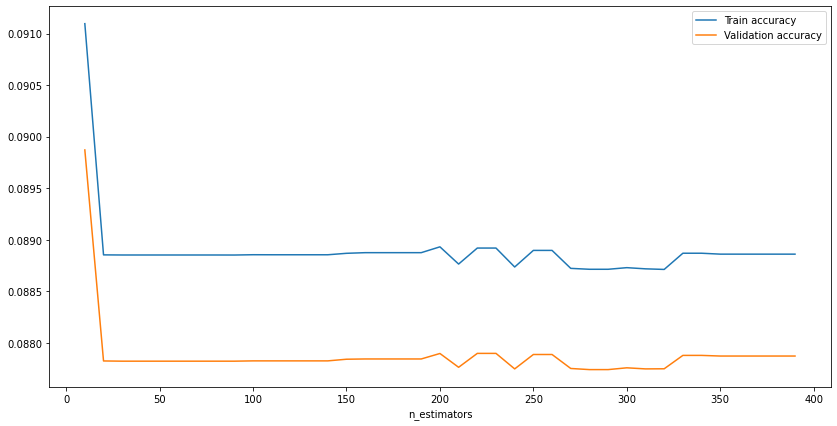

In [140]:
boosting_accuracy_learning_rate_1.plot()

## c. Random Forest

In [141]:
##train the Random Forest model
clf_rf   = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_tr, Y_train_tr)# Random Forest

C:\Users\Owner\AppData\Local\Temp/ipykernel_27956/1941686348.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf   = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_tr, Y_train_tr)# Random Forest


In [142]:
##evaluate the performance of the random forest model on the training set and validation set.
print('Train accuracy')
print('Random Forest accuracy: %.3f'%clf_rf.score(X_train_tr, Y_train_tr))
print('\nValidation accuracy')
print('Random Forest accuracy: %.3f'%clf_rf.score(X_train_val, Y_train_val)) 

Train accuracy
Random Forest accuracy: 0.126

Validation accuracy
Random Forest accuracy: 0.124


In [143]:
##try to improve the model by performing hyper-parameter tuning
param_grid = [{'n_estimators':[10,20,50],
               'max_depth':range(1,8),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,8,16]}]

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), 
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           scoring='accuracy')

grid_search.fit(X_train_tr, Y_train_tr)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 8),
                          'max_leaf_nodes': [2, 4, 8, 16],
                          'min_samples_leaf': [10, 20, 100],
                          'n_estimators': [10, 20, 50]}],
             scoring='accuracy')

In [144]:
rf_accuracy_grid = pd.DataFrame({'n_estimators':grid_search.cv_results_['param_n_estimators'].data,
                                'max_depth':grid_search.cv_results_['param_max_depth'].data,
                                'max_leaf_nodes':grid_search.cv_results_['param_max_leaf_nodes'].data,
                                'min_samples_leaf':grid_search.cv_results_['param_min_samples_leaf'].data,
                                'Accuracy':grid_search.cv_results_['mean_test_score']})

In [145]:
rf_accuracy_grid.head()

,n_estimators,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,10,1,2,10,0.125972
1,20,1,2,10,0.125972
2,50,1,2,10,0.125972
3,10,1,2,20,0.125972
4,20,1,2,20,0.125972


In [146]:
# the best configuration
grid_search.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 10,
 'n_estimators': 20}

In [147]:
# a model trained using the best configuration on all folds
best_RF_model = grid_search.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10,
                       n_estimators=20, random_state=0)

In [148]:
train_accuracy_RF_opt = np.mean(best_RF_model.predict(X_train_tr.values)==Y_train_tr.values)
val_accuracy_RF_opt = np.mean(best_RF_model.predict(X_train_val.values)==Y_train_val.values)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [149]:
accuracy = accuracy_score(Y_train_val,clf_rf.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
#fpr = fp/(fp+tn)
r_rf = fp/(fp+tn)
fpr = r_rf
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,clf_rf.predict(X_train_val),average ='micro')
precision = precision_score(Y_train_val,clf_rf.predict(X_train_val),average ='micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.12, Recall: 0.12, Precision: 0.12 



## d. K-Nearest Neighbors Model¶

In [150]:
##train the K-Nearest Neighbors model
clf_knn = neighbors.KNeighborsClassifier().fit(X_train_tr, Y_train_tr) # K-nearest Neighbors       

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [151]:
##evaluate the performance of K-Nearest Neighbors model on the training set and validation set.
print('Train accuracy:')
print('KNN Accuracy: %.3f'%clf_knn.score(X_train_tr, Y_train_tr))
print('\nValidation accuracy:')
print('KNN accuracy: %.3f'%accuracy_score(Y_train_val, clf_knn.predict(X_train_val)))

Train accuracy:
KNN Accuracy: 0.320

Validation accuracy:
KNN accuracy: 0.115


In [152]:
##use cross-validation to evaluate K-Nearest Neighbors model  
cv_results_knn = cross_validate(neighbors.KNeighborsClassifier(), X_train, Y_train, cv=5, return_estimator=True)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ow

In [153]:
print('KNN - CV accuracy score %.3f'%cv_results_knn['test_score'].mean()) # this is the average value

KNN - CV accuracy score 0.119


In [154]:
## this is the validation set scores
print('KNN - validation accuracy score: %.3f'%accuracy_score(Y_train_val, clf_knn.predict(X_train_val)))

KNN - validation accuracy score: 0.115


## KNN Confusion Matrix & ROC Curve

In [155]:
##create the confusion matrix
conf_matrix = confusion_matrix(Y_train_val,clf_knn.predict(X_train_val))
conf_matrix

array([[310, 134,  91, ...,   0,   0,   0],
       [201, 110,  61, ...,   0,   0,   0],
       [201,  71,  55, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0]], dtype=int64)

In [156]:
accuracy = accuracy_score(Y_train_val,clf_knn.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
r_knn = fp/(fp+tn)
fpr = r_knn
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,clf_knn.predict(X_train_val),average = 'micro')
precision = precision_score(Y_train_val,clf_knn.predict(X_train_val),average = 'micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.12, Recall: 0.12, Precision: 0.12 



## e. XGBoost Model

In [415]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [416]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 15.24%


In [417]:
conf_matrix = confusion_matrix(Y_train_val,model.predict(X_train_val))
conf_matrix

array([[429,  83,  79, ...,   0,   0,   0],
       [167, 177,  42, ...,   0,   0,   0],
       [143,  57, 182, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   1, ...,   0,   0,   0]], dtype=int64)

In [418]:
accuracy = accuracy_score(Y_train_val,model.predict(X_train_val))
tn = conf_matrix.ravel()[0]
fp = conf_matrix.ravel()[1]
fn = conf_matrix.ravel()[2]
tp = conf_matrix.ravel()[3]
tpr = tp/(tp+fn)
#fpr = fp/(fp+tn)
r_rf = fp/(fp+tn)
fpr = r_rf
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)
recall = recall_score(Y_train_val,model.predict(X_train_val),average = 'micro')
precision = precision_score(Y_train_val,model.predict(X_train_val),average = 'micro')
print("Accuracy: %.2f, Recall: %.2f, Precision: %.2f"%(accuracy, recall, precision),'\n')

Accuracy: 0.40, Recall: 0.40, Precision: 0.40 



In [419]:
scores = model.predict_proba(X_train_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_val, scores)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic of XGBoost Model')
plt.legend(loc="lower right")
plt.plot([r_rf], [recall], marker="x", markeredgewidth=5, markersize=12);

ValueError: multiclass format is not supported

## Conclusion: Use XGBoost Model to predict timeline

In [420]:
finalmodel = XGBClassifier().fit(X, Y)

C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [421]:
#finalmodel.predict(X)

In [422]:
data['predict'] = pd.DataFrame(finalmodel.predict(X),index=None,columns = ['predict'])

In [423]:
data.head()

,QuoteID,NameOfQuote,QuoteType,CreationDate,ExpirationDate,CurrentQuoteStatus,CreatedLogon,LastModifiedLogon,SalesPersonName,CompanyName,...,Gross.Margin,Gross.Margin..,salesperson_name,Salesperson.Code,Acquired.By,DaysOld,category,sold_to_code,time,predict
0,18744620.0,Kevin,Purchase,2019-01-02,2019/1/9,Expired,X632257,X632257,"HALE,DUSTIN",NaN,...,US$50.64,0.0018,DUSTIN HALE,S0112,S0431,21,2WD,FOSKITKEC54284,363,363.0
1,18749945.0,NaN,Purchase,2019-01-02,2019/1/9,Expired,X453335,X453335,"KINCH,AARON",JA LENE FARM,...,"US$1,852.71",0.1886,AARON KINCH,S1832,NaN,9,WAG,ISHLERTOC28992,105,105.0
2,18745949.0,Tom C,Purchase,2019-01-02,2019/1/9,Expired,X632257,X632257,"HALE,DUSTIN",NaN,...,"US$1,014.75",0.1046,DUSTIN HALE,S0112,S1919,152,GAT,CONGDONTC20560,56,4.0
3,18748176.0,Town of Niagara Mower,Purchase,2019-01-02,2019/1/31,Signed,X795544,XP66722,"PAYMENT,RYAN",TOWN OF NIAGARA,...,US$67.00,0.1722,OLIN BAILEY,S1018,NaN,338,WBP,TOWNOFC4868,113,6.0
4,18748718.0,RICHARD DECKER,Purchase,2019-01-02,2019/1/31,Won,X358036,X358036,"AMICK JR,ROBERT",NaN,...,US$479.50,0.2089,ROBERT AMICK,S1736,NaN,151,MOW,DECKERRICHARD32,9,9.0


In [424]:
#data.to_csv('finaldata.csv')

In [425]:
df.head()

,EquipmentAmount,NetCost,time,DealerState_OH,DealerState_PA,EquipmentType_Configurator_NewEquipmentConfiguration,EquipmentType_DealerCollateral_NewInventory,EquipmentType_DealerBusinessSystem,EquipmentType_FreeformEntry_NotFromAnyExternalSources,EquipmentType_JDSC_Equipment,EquipmentType_UsedEquipment_UsedInventory,EquipmentType_e_Valuator,BaseImplement_Implement
0,27800.0,25600.00,363,0,0,0,0,1,0,0,0,0,0
1,9825.0,7940.62,105,0,1,0,0,1,0,0,0,0,0
2,7325.0,8023.70,56,0,0,0,0,1,0,0,0,0,0
3,389.0,322.00,113,0,0,0,0,1,0,0,0,0,0
4,2195.0,14679.71,9,0,1,1,0,0,0,0,0,0,0


In [426]:
df.columns

Index(['EquipmentAmount', 'NetCost', 'time', 'DealerState_OH',
       'DealerState_PA',
       'EquipmentType_Configurator_NewEquipmentConfiguration',
       'EquipmentType_DealerCollateral_NewInventory',
       'EquipmentType_DealerBusinessSystem',
       'EquipmentType_FreeformEntry_NotFromAnyExternalSources',
       'EquipmentType_JDSC_Equipment',
       'EquipmentType_UsedEquipment_UsedInventory', 'EquipmentType_e_Valuator',
       'BaseImplement_Implement'],
      dtype='object')

In [427]:
data.columns

Index(['QuoteID', 'NameOfQuote', 'QuoteType', 'CreationDate', 'ExpirationDate',
       'CurrentQuoteStatus', 'CreatedLogon', 'LastModifiedLogon',
       'SalesPersonName', 'CompanyName', 'ContactLastName', 'ContactFirstName',
       'City', 'StateProvince', 'PostalZip', 'Phone', 'Customer.Email',
       'DealerID', 'DealerName', 'DealerCity', 'DealerState', 'EquipmentCode',
       'EquipmentDescription', 'EquipmentType', 'EquipmentSerialNumber',
       'EquipmentQuantity', 'EquipmentAmount', 'TotalSales', 'SellingPrice',
       'EquipmentManufacturer', 'EquipmentCategoryDesc',
       'EquipmentSubCategoryDesc', 'EquipmentManufactureYear',
       'EquipmentModel', 'StockNumber', 'IncentiveProgramNumber',
       'EquipmentStatus', 'TradeInCode', 'TradeInDescription',
       'TradeInSerialNumber', 'TradeInQuantity', 'NetTradeValue',
       'TradeInManufacturer', 'TradeInCategoryDesc', 'TradeInSubCategoryDesc',
       'TradeInManufactureYear', 'TradeInModel', 'PONumber',
       'FinanceInc

In [244]:
data[['CreationDate','Sale.Date','time']]

,CreationDate,Sale.Date,time
0,2019-01-02,2019-12-31,363
1,2019-01-02,2019-04-17,105
2,2019-01-02,2019-02-27,56
3,2019-01-02,2019-04-25,113
4,2019-01-02,2019-01-11,9
...,...,...,...
37299,2021-09-13,2021-09-14,1
37300,2021-09-13,2021-09-14,1
37302,2021-09-13,2021-09-14,1
37303,2021-09-13,2021-09-14,1


In [431]:
df.describe()

,EquipmentAmount,NetCost,time,DealerState_OH,DealerState_PA,EquipmentType_Configurator_NewEquipmentConfiguration,EquipmentType_DealerCollateral_NewInventory,EquipmentType_DealerBusinessSystem,EquipmentType_FreeformEntry_NotFromAnyExternalSources,EquipmentType_JDSC_Equipment,EquipmentType_UsedEquipment_UsedInventory,EquipmentType_e_Valuator,BaseImplement_Implement
count,29584.000000,2.958400e+04,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000
mean,9256.844904,1.523277e+04,18.783396,0.031639,0.273222,0.231003,0.000203,0.481240,0.073486,0.165157,0.004462,0.001521,0.251893
std,25470.078555,4.628899e+04,33.193608,0.175039,0.445621,0.421482,0.014240,0.499656,0.260936,0.371328,0.066649,0.038972,0.434107
min,0.000000,-5.314000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1949.000000,2.100000e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3495.000000,5.532625e+03,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9178.480000,1.711873e+04,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,646325.000000,1.676404e+06,582.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [428]:
df.to_csv('streamlitdata.csv')

In [429]:
# save the model to disk
filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
with open(filename,'wb') as fp:
    pickle.dump(finalmodel,fp)

In [8]:
streamlitdata = pd.read_csv('streamlitdata.csv')
streamlitdata = streamlitdata.drop(['Unnamed: 0'],axis = 1)
streamlitdata.to_csv('streamlitdata.csv')